In [1]:
#Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
#Read the dataset:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
#Check the data balance:
df['default'].value_counts()

0    8149
1    1851
Name: default, dtype: int64

In [4]:
#As the data is imbalanced, we need to do sampling to even amounts of data for each value of dependent variables.
#Oversampling
zero_data = df[df['default'] == 0].sample(n=1851, random_state=42) 
df1 = pd.concat([zero_data, df[df['default'] == 1]], ignore_index = True)
df1['default'].value_counts()

0    1851
1    1851
Name: default, dtype: int64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Total Debt Outstanding')

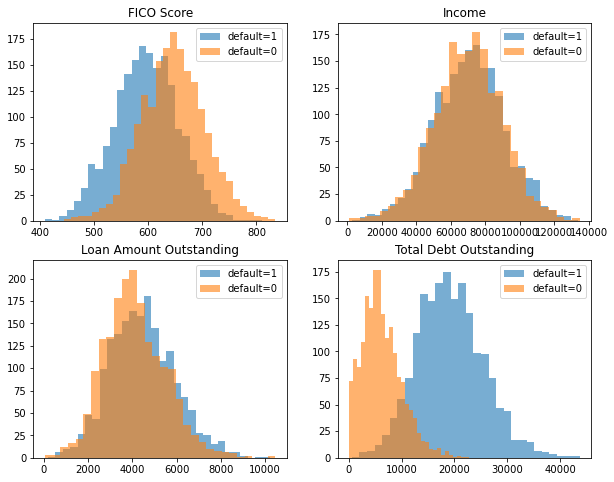

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
#FICO Score
axs[0,0].hist(df1[df1['default']==1]['fico_score'],bins=30,alpha=0.6,label='default=1')
axs[0,0].hist(df1[df1['default']==0]['fico_score'],bins=30,alpha=0.6,label='default=0')
axs[0,0].legend()
axs[0,0].set_title("FICO Score")

#Income
axs[0,1].hist(df1[df1['default']==1]['income'],bins=30,alpha=0.6,label='default=1')
axs[0,1].hist(df1[df1['default']==0]['income'],bins=30,alpha=0.6,label='default=0')
axs[0,1].legend()
axs[0,1].set_title("Income")

#Loan amount Outstanding
axs[1,0].hist(df1[df1['default']==1]['loan_amt_outstanding'],bins=30,alpha=0.6,label='default=1')
axs[1,0].hist(df1[df1['default']==0]['loan_amt_outstanding'],bins=30,alpha=0.6,label='default=0')
axs[1,0].legend()
axs[1,0].set_title("Loan Amount Outstanding")

#Total Debt Outstanding
axs[1,1].hist(df1[df1['default']==1]['total_debt_outstanding'],bins=30,alpha=0.6,label='default=1')
axs[1,1].hist(df1[df1['default']==0]['total_debt_outstanding'],bins=30,alpha=0.6,label='default=0')
axs[1,1].legend()
axs[1,1].set_title("Total Debt Outstanding")

Text(0.5, 1.0, 'FICO Score VS Loan Amount Outstanding')

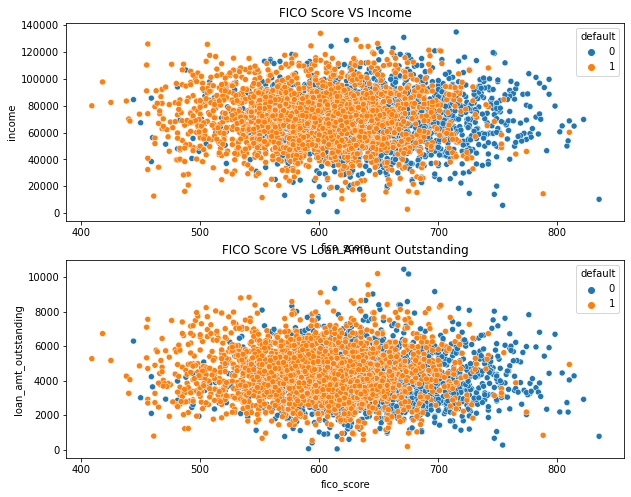

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
#FICO Score VS Income
sns.scatterplot(x = df1['fico_score'],y = df1['income'], hue = df1['default'], ax=axs[0])
axs[0].set_title("FICO Score VS Income")

#FICO_score VS Loan Amount Outstanding
sns.scatterplot(x = df1['fico_score'],y = df1['loan_amt_outstanding'], hue = df1['default'], ax=axs[1])
axs[1].set_title("FICO Score VS Loan Amount Outstanding")



In [7]:
# FICO_score greater than 670 is a good score.
good_df = df1[df1["fico_score"] >= 670]
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 4 to 3699
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               813 non-null    int64  
 1   credit_lines_outstanding  813 non-null    int64  
 2   loan_amt_outstanding      813 non-null    float64
 3   total_debt_outstanding    813 non-null    float64
 4   income                    813 non-null    float64
 5   years_employed            813 non-null    int64  
 6   fico_score                813 non-null    int64  
 7   default                   813 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 57.2 KB


<AxesSubplot:xlabel='credit_lines_outstanding', ylabel='count'>

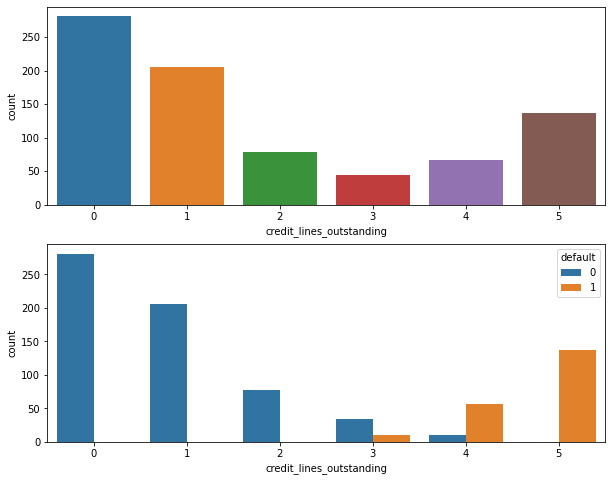

In [8]:
#Credit Lines Outstanding for FICO Score >= 670
clo_data = pd.DataFrame(good_df['credit_lines_outstanding'].value_counts()) 
clo_data_new = clo_data.reset_index()
clo_data_new.columns = ['credit_lines_outstanding', 'count']
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
sns.barplot(x="credit_lines_outstanding", y="count", data=clo_data_new, ax = axs[0])
sns.countplot(x=good_df["credit_lines_outstanding"], hue = good_df["default"], ax = axs[1])

#### In the group of customers with less than 3 outstanding credit lines, there are no defaulters. But as the number of outstanding credit lines increase from 3, the number of defaulters increase.
#### There was a high count of 5 credit lines outstanding customers in FICO Score >= 670 group.

<AxesSubplot:xlabel='years_employed', ylabel='count'>

<Figure size 720x360 with 0 Axes>

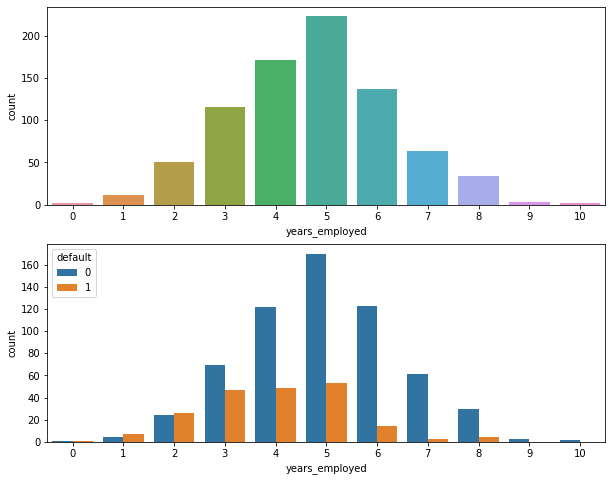

In [9]:
#Year Employed for FICO Score >= 670
yr_employ_data = pd.DataFrame(good_df['years_employed'].value_counts()) 
yr_employ_data_new = yr_employ_data.reset_index()
yr_employ_data_new.columns = ['years_employed', 'count']
plt.figure(figsize = (10,5))
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
sns.barplot(x="years_employed", y="count", data=yr_employ_data_new, ax = axs[0])
sns.countplot(x=good_df["years_employed"], hue = good_df["default"], ax = axs[1])

#### Customers with 4-6 years of employment have FICO score higher than 670 (Good score) and many of them are not defaulters according to the 2nd graph.

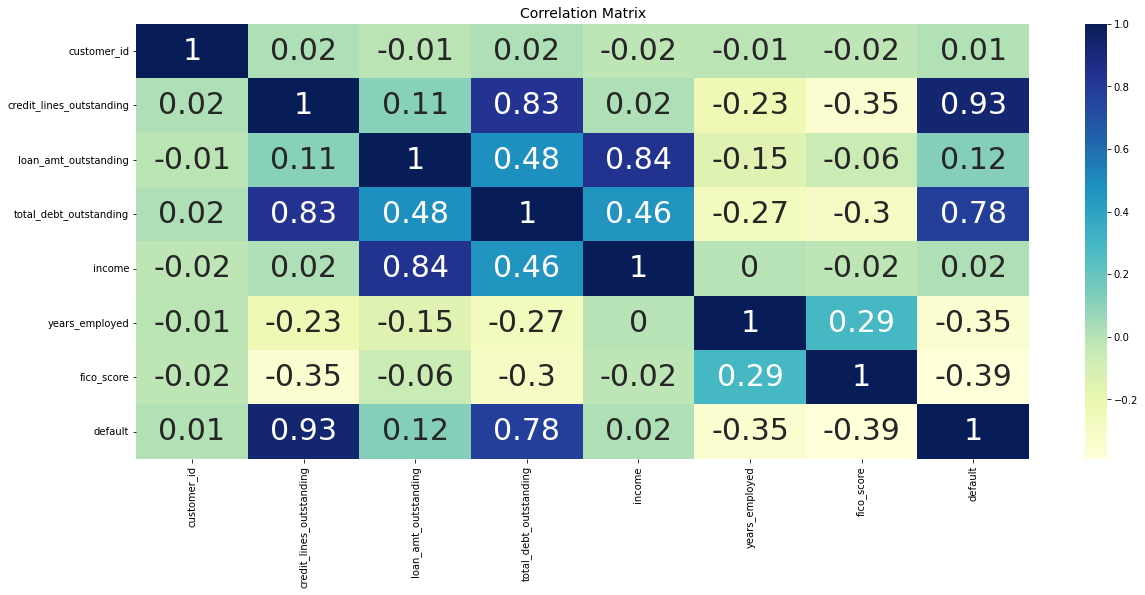

In [10]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,8))

# Imbalanced DataFrame Correlation
corr = df1.corr().round(2)
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax, annot = True)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

#### There is a high correlation between income and outstanding loan amount. So take into consideration, ratio of income and loan_amt_outstanding.
#### High correlation between total outstanding amount and credit lines outstanding,

<AxesSubplot:xlabel='credit_lines_outstanding', ylabel='mean'>

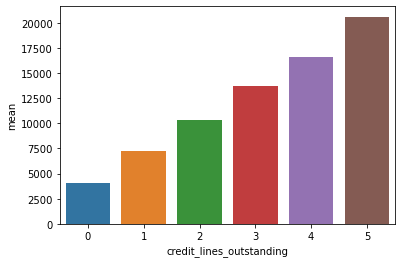

In [11]:
df_grp=df1.groupby(['credit_lines_outstanding'])['total_debt_outstanding'].mean().reset_index(name='mean')
sns.barplot(x="credit_lines_outstanding", y="mean", data=df_grp)

## Model Building

### Logistic Regression

In [12]:
#Libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
#Create X and y data
X = df1.drop(columns = ['default'], axis = 1)
y = df1['default']

In [14]:
#Split data into train and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [15]:
# Build Logistic Model -
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression().fit(X_train, y_train)

In [16]:
#Predict values -
log_preds = logistic_model.predict_proba(X_test)
log_preds_df = pd.DataFrame(log_preds[:,1][0:], columns = ['log_preds'])
log_preds_df['log_preds_50'] = log_preds_df['log_preds'].apply(lambda x: 1 if x > 0.50 else 0)

In [17]:
#Confusion Matrix -
print("Confusion Matrix (50%) for Logistic Model: ")
print(confusion_matrix(y_test, log_preds_df['log_preds_50']))

Confusion Matrix (50%) for Logistic Model: 
[[561  16]
 [  8 526]]


In [18]:
#Accuracy -
print(f"Accuracy of the Logistic Model = {logistic_model.score(X_test, y_test).round(4)}")

Accuracy of the Logistic Model = 0.9784


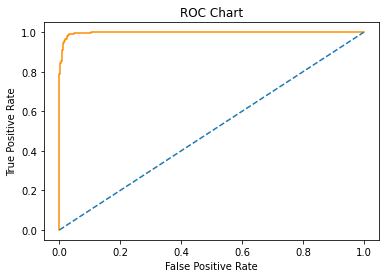

In [19]:
#ROC Curve -
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_preds[:, 1])
plt.plot(fpr, tpr, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Chart")
plt.show()

In [20]:
#Classification Report -
from sklearn.metrics import classification_report
print("Classification Report for Logistic Model:\n")
print(classification_report(y_test, log_preds_df['log_preds_50']))

Classification Report for Logistic Model:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       577
           1       0.97      0.99      0.98       534

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111



In [21]:
#Calculate expected loss-
recovery_rate = 0.1  
df_logistic = df1.copy()
df_logistic.drop(['default'], axis=1,inplace=True)
probs = logistic_model.predict_proba(df_logistic)
prob_data = pd.DataFrame(probs[:,1][0:].round(decimals = 2), columns = ['Default_prob'])
df_logistic = pd.concat([df_logistic, prob_data], axis = 1)
df_logistic['Loan_default'] = (1 - recovery_rate) * df_logistic['loan_amt_outstanding']
df_logistic['expected_loss_logistic'] = df_logistic['Default_prob'] * df_logistic['Loan_default']

In [22]:
df_logistic

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Default_prob,Loan_default,expected_loss_logistic
0,1744723,0,3843.327696,8574.747616,97901.15069,3,508,0.0,3458.994926,0.000000
1,7997832,1,4349.851362,8250.744791,76849.23714,6,644,0.0,3914.866226,0.000000
2,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0.0,2960.011499,0.000000
3,7444989,1,5461.278743,7678.078716,85425.38169,5,632,0.0,4915.150869,0.000000
4,4809605,1,4336.096604,8430.374191,78750.07703,7,695,0.0,3902.486944,0.000000
...,...,...,...,...,...,...,...,...,...,...
3697,2078988,5,4940.924258,19623.949530,72378.73862,2,552,1.0,4446.831832,4446.831832
3698,2118579,5,5122.908631,20777.113410,76232.83668,3,599,1.0,4610.617768,4610.617768
3699,6990844,5,3135.006926,17054.772730,59367.84811,5,707,1.0,2821.506233,2821.506233
3700,5183374,5,3691.123065,17106.078110,64632.03187,3,469,1.0,3322.010759,3322.010759


### Decision Tree

In [23]:
#Fit the model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [24]:
#Accuracy Score
print(f"Accuracy of the Decision Tree Model = {dt_model.score(X_test, y_test).round(4)}")

Accuracy of the Decision Tree Model = 0.9838


In [25]:
#Confusion Matrix -
print("Confusion Matrix for Decision Tree Model: ")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Model: 
[[566  11]
 [  7 527]]


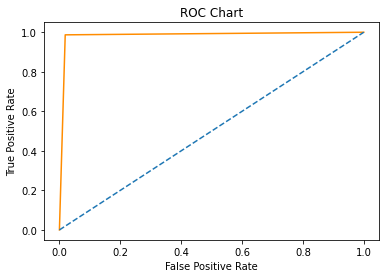

In [26]:
#ROC Curve -
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Chart")
plt.show()

In [27]:
#Classification Report -
print("Classification Report for Decision Tree Model:\n")
print(classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree Model:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       577
           1       0.98      0.99      0.98       534

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111



In [30]:
#Calculate expected loss-
recovery_rate = 0.1  
df_dt = df1.copy()
df_dt.drop(['default'], axis=1,inplace=True)
probs_dt = dt_model.predict_proba(df_dt)
prob_data = pd.DataFrame(probs_dt[:,1][0:].round(decimals = 2), columns = ['Default_prob'])
df_dt = pd.concat([df_dt, prob_data], axis = 1)
df_dt['Loan_default'] = (1 - recovery_rate) * df_dt['loan_amt_outstanding']
df_dt['expected_loss_dt'] = df_dt['Default_prob'] * df_dt['Loan_default']

In [31]:
df_dt

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Default_prob,Loan_default,expected_loss_dt
0,1744723,0,3843.327696,8574.747616,97901.15069,3,508,0.0,3458.994926,0.000000
1,7997832,1,4349.851362,8250.744791,76849.23714,6,644,0.0,3914.866226,0.000000
2,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0.0,2960.011499,0.000000
3,7444989,1,5461.278743,7678.078716,85425.38169,5,632,0.0,4915.150869,0.000000
4,4809605,1,4336.096604,8430.374191,78750.07703,7,695,0.0,3902.486944,0.000000
...,...,...,...,...,...,...,...,...,...,...
3697,2078988,5,4940.924258,19623.949530,72378.73862,2,552,1.0,4446.831832,4446.831832
3698,2118579,5,5122.908631,20777.113410,76232.83668,3,599,1.0,4610.617768,4610.617768
3699,6990844,5,3135.006926,17054.772730,59367.84811,5,707,1.0,2821.506233,2821.506233
3700,5183374,5,3691.123065,17106.078110,64632.03187,3,469,1.0,3322.010759,3322.010759
